Titanic challenge (https://www.kaggle.com/c/titanic![image.png](attachment:image.png)

In [ ]:
# importing required libraries
import numpy as np
import pandas as pd
from sklearn import tree
import warnings
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier

# reading and displaying train data
train_data = pd.read_csv("/content/train.csv")
train_data.head()


# reading and displaying test data
test_data = pd.read_csv("/content/test.csv")
test_data.head()

#printing data
print(train_data)


# removing null values and duplicates
train_data = train_data.dropna()
train_data = train_data.drop_duplicates()


#transforming data
train_data["Embarked"] = train_data["Embarked"].map({'C': 0, 'Q': 1, 'S': 2}).astype(int)
train_data["Sex"] = train_data["Sex"].map({'male': 1, 'female': 0}).astype(int)

# elminiating redundant columns and columns which have been transformed
to_be_dropped_col = ['Name', 'Cabin', 'Ticket', 'Fare']
train_data = train_data.drop(to_be_dropped_col, axis=1)

#interpolation
train_data["Age"] = train_data['Age'].interpolate()


# printing transformed data
print("After mod")
print(train_data)

'''
# code from Kaggal challenge
women = train_data.loc[train_data.Sex == 'female']["Survived"]
rate_women = sum(women)/len(women)

print("% of women who survived:", rate_women)

men = train_data.loc[train_data.Sex == 'male']["Survived"]
rate_men = sum(men)/len(men)

print("% of men who survived:", rate_men)

from sklearn.ensemble import RandomForestClassifier

y = train_data["Survived"]

features = ["Pclass", "Sex", "SibSp", "Parch"]
X = pd.get_dummies(train_data[features])
X_test = pd.get_dummies(test_data[features])

model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=1)
model.fit(X, y)
predictions = model.predict(X_test)

output = pd.DataFrame({'PassengerId': test_data.PassengerId, 'Survived': predictions})
output.to_csv('submission.csv', index=False)
print("Your submission was successfully saved!")
'''

     PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                                 ...     ...   ... 

'\n# code from Kaggal challenge\nwomen = train_data.loc[train_data.Sex == \'female\']["Survived"]\nrate_women = sum(women)/len(women)\n\nprint("% of women who survived:", rate_women)\n\nmen = train_data.loc[train_data.Sex == \'male\']["Survived"]\nrate_men = sum(men)/len(men)\n\nprint("% of men who survived:", rate_men)\n\nfrom sklearn.ensemble import RandomForestClassifier\n\ny = train_data["Survived"]\n\nfeatures = ["Pclass", "Sex", "SibSp", "Parch"]\nX = pd.get_dummies(train_data[features])\nX_test = pd.get_dummies(test_data[features])\n\nmodel = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=1)\nmodel.fit(X, y)\npredictions = model.predict(X_test)\n\noutput = pd.DataFrame({\'PassengerId\': test_data.PassengerId, \'Survived\': predictions})\noutput.to_csv(\'submission.csv\', index=False)\nprint("Your submission was successfully saved!")\n'

Plot of decision tree classifier

0.8306010928961749

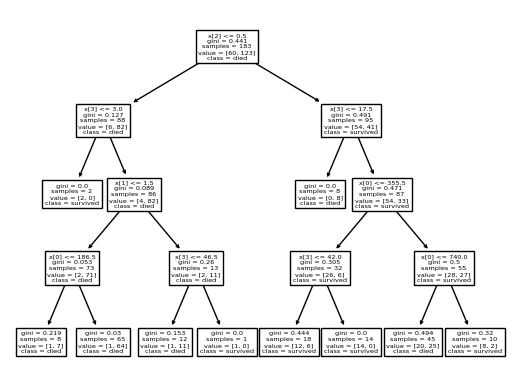

In [ ]:
#feature matrix
X = train_data.drop(['Survived'], axis=1).values
Y = train_data['Survived'].values

# creating instance
dec_tree_clf = tree.DecisionTreeClassifier(max_depth = 4)
dec_tree_clf = dec_tree_clf.fit(X,Y)

#decision tree visual
tree.plot_tree(dec_tree_clf, class_names = ['survived', 'died'])

#computig the accuracy for observation
dec_tree_clf.score(X,Y)

In [ ]:
# removing null values and duplicates
test_data = test_data.dropna()
test_data = test_data.drop_duplicates()

##transforming and interpolation
test_data["Sex"] = test_data["Sex"].map({'male': 1, 'female': 0}).astype(int)
test_data["Embarked"] = test_data["Embarked"].map({'C': 0, 'Q': 1, 'S': 2}).astype(int)
test_data["Age"] = test_data['Age'].interpolate()

#storing test values
test_data_passengerId_copy = test_data["PassengerId"]

# elminiating columns
test_data = test_data.drop(to_be_dropped_col, axis=1)

clf_val = dec_tree_clf.predict(test_data)
clf_data = pd.DataFrame({"PassengerId":test_data_passengerId_copy,"Survived":clf_val})

#printing result
print(clf_data)

     PassengerId  Survived
12           904         1
14           906         1
24           916         1
26           918         1
28           920         0
..           ...       ...
404         1296         0
405         1297         0
407         1299         0
411         1303         1
414         1306         1

[87 rows x 2 columns]


Applying the five-fold cross validation of my fine-tuned decision tree learning model to the Titanic training data to extract average classification accuracy

In [ ]:
# creating instance
cross_validation = KFold(n_splits=5)
cross_validation_scores = cross_val_score(dec_tree_clf, X, Y, cv=cross_validation)

# printing mean accuracy
print(cross_validation_scores.mean())

0.6558558558558559


Applying the five-fold cross validation of my fine-tuned random forest learning  model to the Titanic training data to extract average classification accuracy

In [ ]:
# creating instance
model_rfl = RandomForestClassifier()
model_rfl = model_rfl.fit(X,Y)

#making predecitions
y_pred_forest = model_rfl.predict(test_data)
y_pred_forest
cross_validation_score = cross_val_score(model_rfl, X, Y, cv=cross_validation)

# printing result
print(cross_validation_scores.mean())

0.6558558558558559


Bagging classifier using Scikit Learn for the above Titanic challenge.

In [ ]:
# creating instance of DTC and bagging clf
classification = tree.DecisionTreeClassifier(max_depth=4)
bag_clf = BaggingClassifier(estimator=classification, n_estimators=200)

# fitting the bagging clf
bag_clf.fit(X, Y)

#making predecitions
y_prediction = bag_clf.predict(test_data)

# printing mean accuracy
bag_clf.score(X, Y)

0.8907103825136612

Adaboost classifier using Scikit Learn for the above Titanic challenge.

In [ ]:
#creating instance of AdaBoost
adaBoost = AdaBoostClassifier(learning_rate=1.0, n_estimators=200)

# fitiing
adaBoost.fit(X,Y)

#making predictions
y_prediction = adaBoost.predict(test_data)

# printing mean accuracy
adaBoost.score(X,Y)

0.9781420765027322